In [1]:
#do some common imports
import os, sys

###some wes-specific things
#sys.path.append("../common/")
#from python_tools import *

#but this does all of it instead
import uproot
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import *
import scipy as sp
import scipy.stats
import glob


In [2]:
%matplotlib notebook

In [3]:
#some plotting defaults
plt.rc('font', family='serif', size=12)
plt.rc('image', cmap='seismic')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=['b','g','r','c','m','y','k','indigo','orange','#137e6d'])


In [4]:
#pick up our root file
root_filename = "~/Downloads/T2K_comparisons_CC0pi_I_CH.root"

In [5]:
#get covriance matrix
m_cov,axes = uproot.open(root_filename)['T2K_CC0pi_XSec_2DPcos_nu_I_COV'].numpy

[[3.5050800e-03 5.6703000e-04 1.6528880e-06 ... 3.9145720e-04
  6.1529220e-04 2.1241470e-05]
 [5.6703000e-04 4.8612270e-03 5.9000600e-07 ... 3.0433290e-04
  4.4593100e-04 7.9915820e-06]
 [1.6528880e-06 5.9000600e-07 2.2960675e-08 ... 1.2180780e-06
  9.6557900e-08 5.4948400e-08]
 ...
 [3.9145720e-04 3.0433290e-04 1.2180780e-06 ... 2.3436930e-03
  1.4313530e-04 4.4912070e-05]
 [6.1529220e-04 4.4593100e-04 9.6557900e-08 ... 1.4313530e-04
  1.2637180e-03 1.9424690e-05]
 [2.1241470e-05 7.9915820e-06 5.4948400e-08 ... 4.4912070e-05
  1.9424690e-05 4.3587460e-06]]


<IPython.core.display.Javascript object>


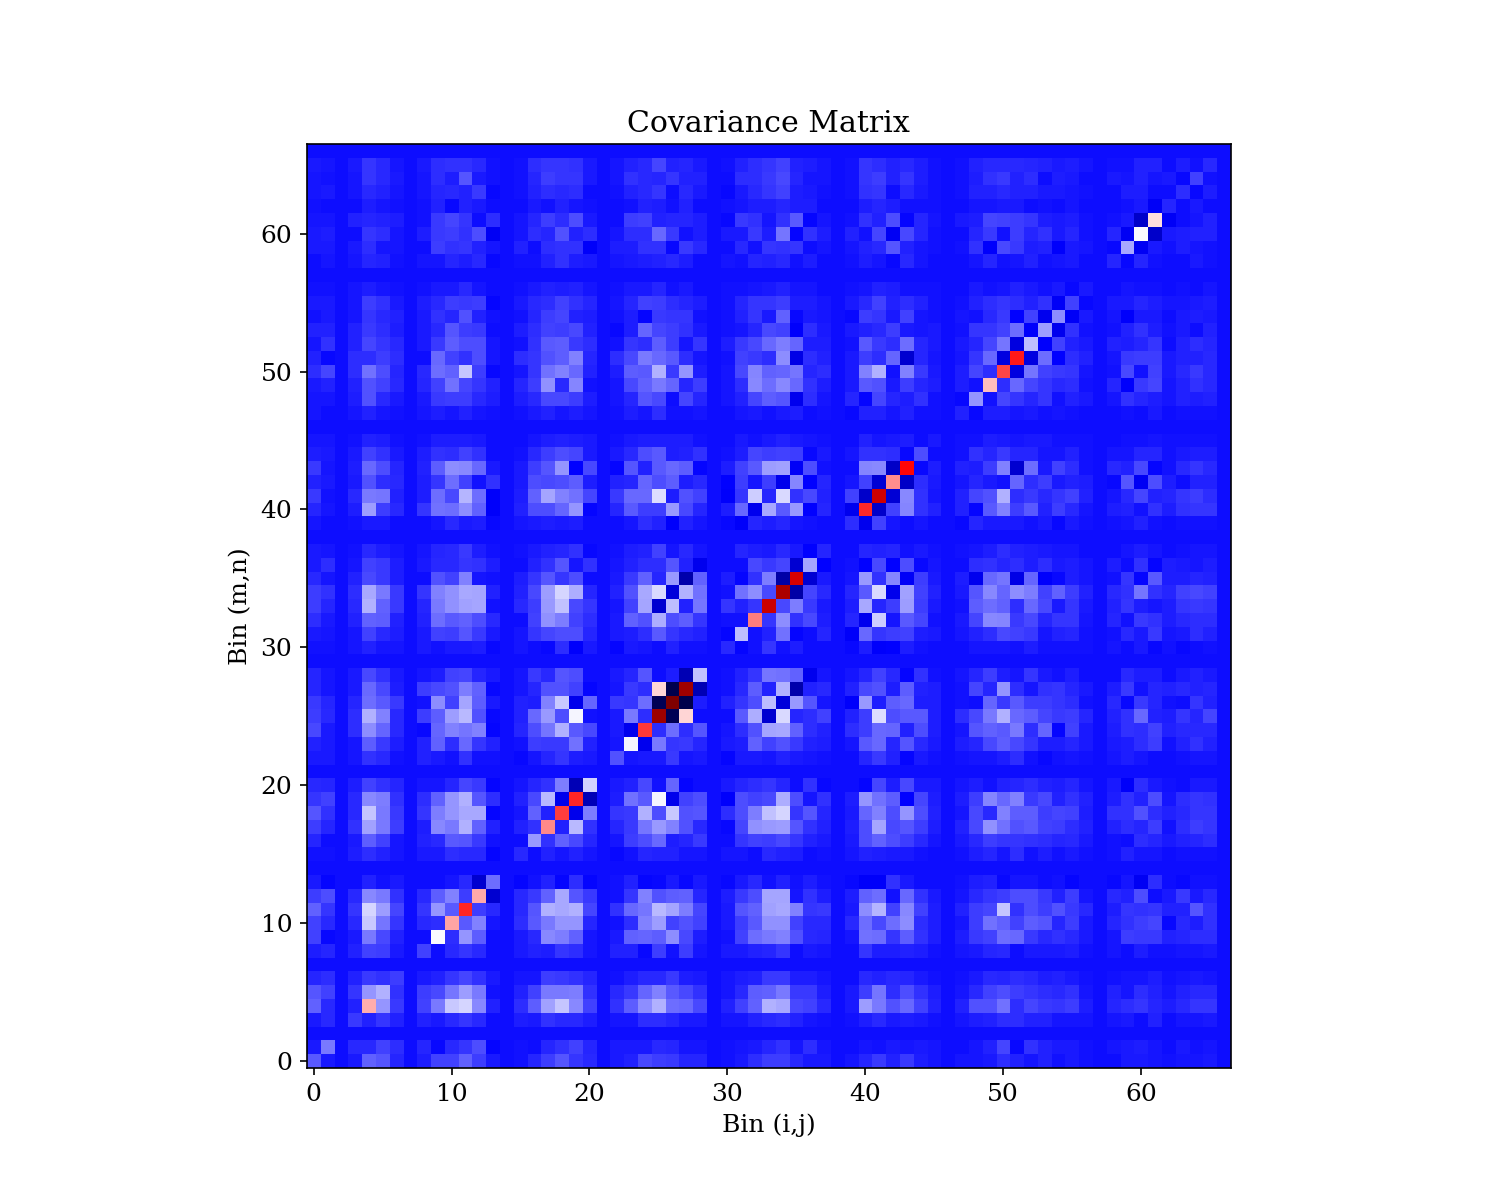

In [6]:
#print and draw it ...

print m_cov

fig,ax = plt.subplots()

ax.imshow(m_cov,origin='lower')
ax.set_ylabel('Bin (m,n)')
ax.set_xlabel('Bin (i,j)')
ax.set_title('Covariance Matrix')

plt.show()

In [7]:
#need to scale data and MC by this to match the chi2?
measurement_scale=1e38

#get data histogram
data = np.asarray(uproot.open(root_filename)['datahist'].values)*measurement_scale
data_err = np.sqrt(np.asarray(uproot.open(root_filename)['datahist'].variances))*measurement_scale

In [8]:
#get MC histogram
mc1 = np.asarray(uproot.open(root_filename)['T2K_CC0pi_XSec_2DPcos_nu_I_MC'].values)*measurement_scale
mc1_err = np.sqrt(np.asarray(uproot.open(root_filename)['T2K_CC0pi_XSec_2DPcos_nu_I_MC'].variances))*measurement_scale

In [9]:
#define an error matrix from the covariance matrix diagonals for plotting purposes...

mc1_cov_err = np.array([ np.sqrt(m_cov[i,i]) for i in range(len(mc1)) ])

In [10]:
#some prints ...
print data
print data_err
print data_err/data

print mc1
print mc1_err
print mc1_cov_err

[2.55394e-01 2.07948e-01 2.71813e-04 2.08457e-01 7.24434e-01 5.51849e-01
 2.34113e-01 3.68685e-04 1.78667e-01 6.38440e-01 7.14696e-01 9.35747e-01
 6.46835e-01 7.15046e-02 4.76125e-04 1.04217e-01 4.90643e-01 8.24596e-01
 9.15528e-01 7.75158e-01 2.55488e-01 2.19411e-03 1.30715e-01 4.94917e-01
 7.60770e-01 9.29140e-01 6.05259e-01 4.78013e-01 3.30544e-01 1.70600e-03
 5.19623e-02 3.83728e-01 7.43677e-01 8.63931e-01 1.02885e+00 4.65526e-01
 2.88899e-01 1.74840e-01 5.06115e-04 1.18570e-01 6.52239e-01 8.21718e-01
 4.74617e-01 5.84867e-01 3.51801e-01 1.13308e-01 1.52386e-03 9.71869e-02
 3.61972e-01 6.18293e-01 8.14948e-01 5.19460e-01 5.54242e-01 3.90123e-01
 2.58903e-01 3.10958e-01 1.15618e-01 3.93359e-03 1.30586e-01 2.25854e-01
 3.38863e-01 3.01963e-01 1.17946e-01 2.39808e-01 2.83177e-01 2.81044e-01
 1.28204e-02]
[5.92037161e-02 6.97225000e-02 1.51527803e-04 4.48732437e-02
 1.21277079e-01 8.62873108e-02 4.61023427e-02 1.02469527e-04
 4.94477401e-02 1.03002330e-01 1.22527426e-01 1.43763660e-01


In [11]:
#does the diagnoal error from the covraiance matrix match the data errors?
if np.allclose(mc1_cov_err,data_err,rtol=1e-7,atol=1e-9): #put some small tolerances...
    print "Assigned data errors agree with covariance matrix diagonals!"
else:
    print "Assigned data errors DO NOT agree with covariance matrix diagonals!"
    print data_err-mc1_cov_err

Assigned data errors agree with covariance matrix diagonals!


In [12]:
#define the number of bins for convenience
n_bins = len(data)

In [13]:
#helper function to plot "error bars" on the MC
def plot_shaded_errors(ax,x,xerr,y,yerr,**kwargs):
    for i in range(len(y)):
        ax.fill_between([x[i]-xerr[i],x[i]+xerr[i]],y[i]-yerr[i],y[i]+yerr[i],**kwargs)
    return ax

<IPython.core.display.Javascript object>


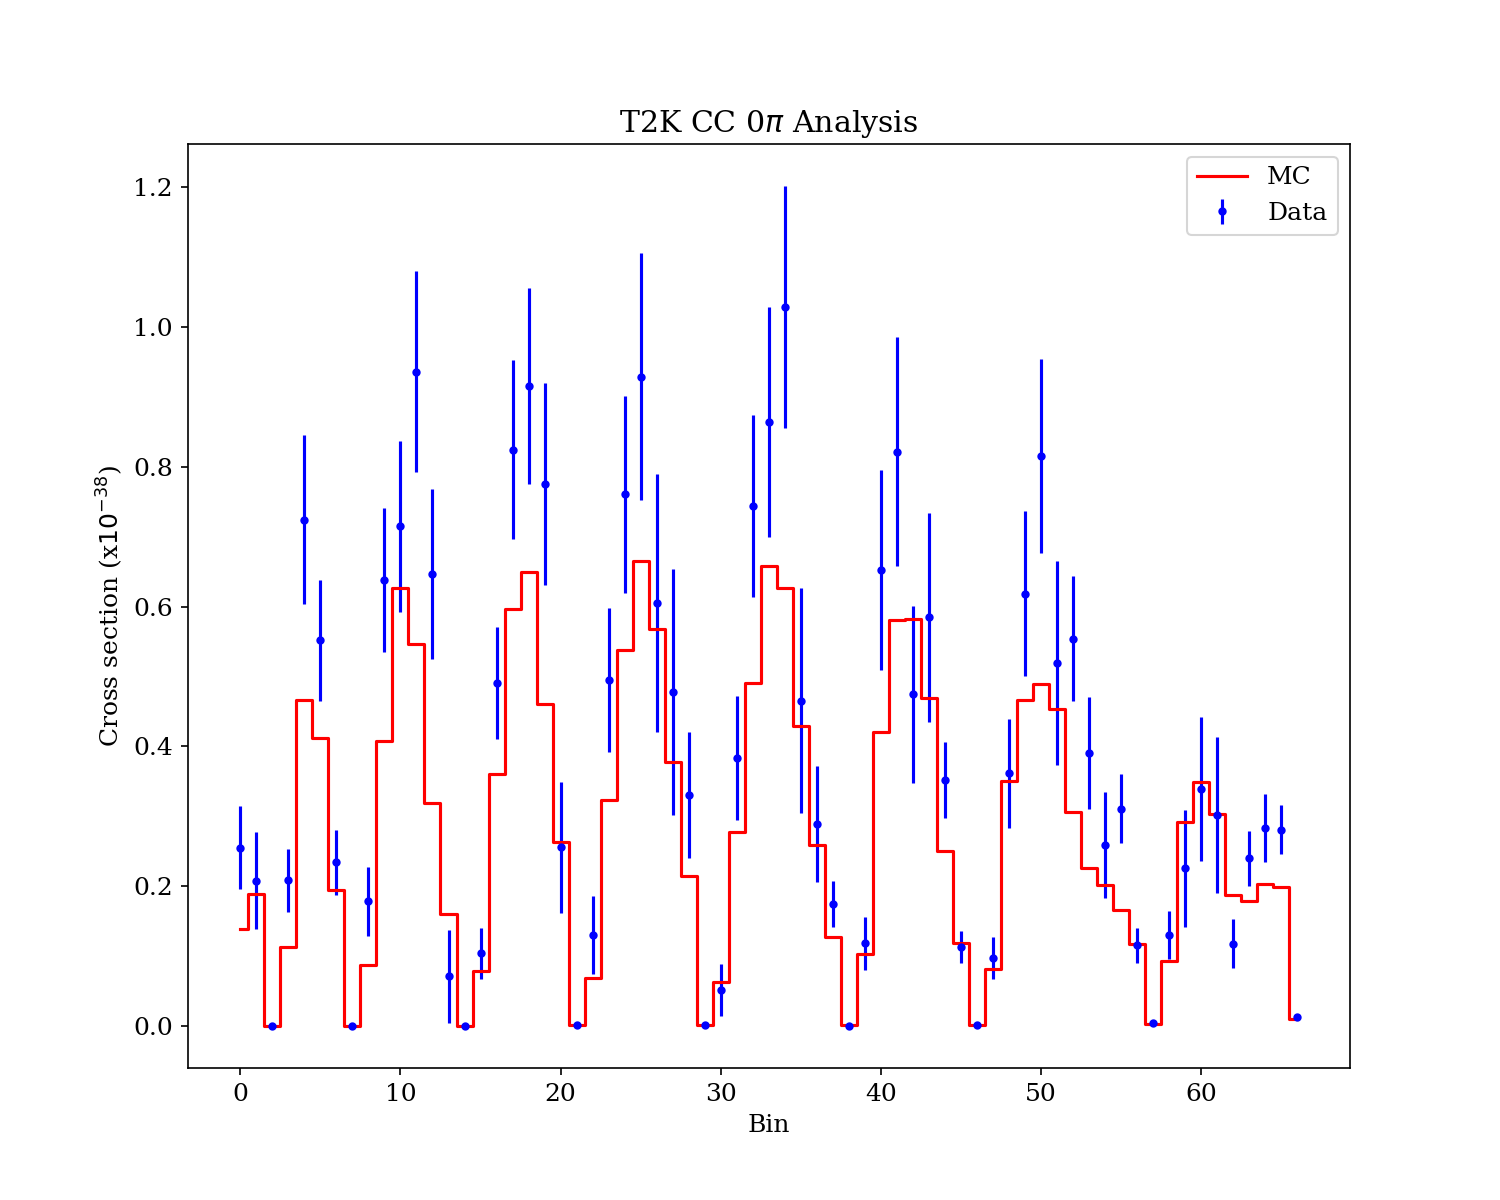

In [14]:
#make a simple plot...

fig,ax = plt.subplots()

ax.errorbar(x=np.arange(len(data)),y=data,yerr=data_err,linestyle="",marker=".",label="Data")
ax.step(x=np.arange(len(mc1)),y=mc1,color='r',linestyle="-",marker="",where="mid",label="MC")
ax.set_title("T2K CC 0$\pi$ Analysis")
ax.set_xlabel("Bin")
ax.set_ylabel("Cross section (x$10^{-38}$)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


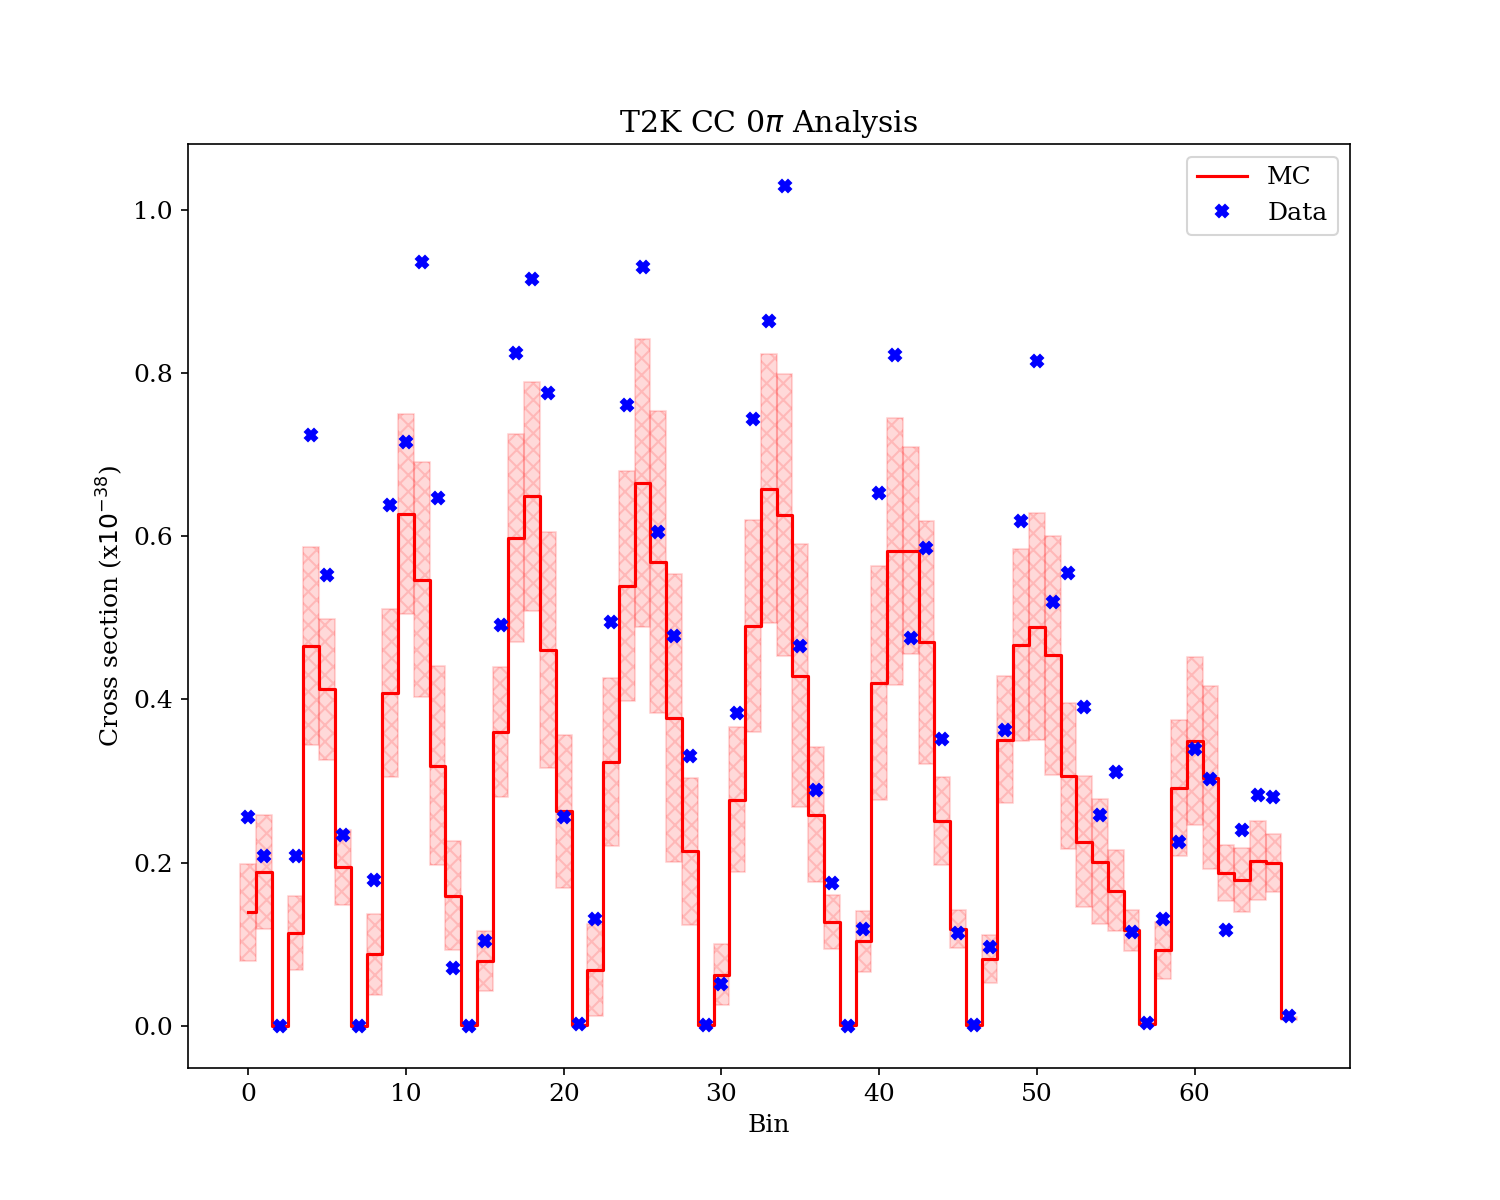

In [15]:
#alternatively, could plot it where we assign the error bars to the MC
#I'm actually not 100% sure what to do here ... 
#This feels more right to me?

fig,ax = plt.subplots()

ax.step(x=np.arange(len(mc1)),y=mc1,color='r',linestyle="-",marker="",where="mid",label="MC")
plot_shaded_errors(ax,
                   x=np.arange(n_bins),xerr=np.full(n_bins,0.5),
                   y=mc1,yerr=mc1_cov_err,
                   facecolor='r',alpha=0.15,color='r',hatch="///\\\\\\")
ax.plot(np.arange(len(data)),data,linestyle="",marker="X",label="Data")
ax.set_title("T2K CC 0$\pi$ Analysis")
ax.set_xlabel("Bin")
ax.set_ylabel("Cross section (x$10^{-38}$)")
plt.legend()
plt.show()

In [16]:
#define a function to get a subset of a matrix
#needs a list of row/column numbers to include
def get_matrix_subset(matrix,indices):
    return matrix[:,indices][indices,:]

#define a function to get a subset of an array
#needs a list of row/column numbers to include
def get_array_subset(array,indices):
    return array[indices]

#function to calculate a total chi2
#needs covariance matrix, 'data', and expected
#returns sum of chi2
def calc_chi2(m_cov,data,exp,exp_scale=1.0):
    return np.matmul((data-exp*exp_scale),np.matmul(np.linalg.inv(m_cov*exp_scale*exp_scale),(data-exp*exp_scale)))

#function to calculate the total chi2 from a subset of the bins
#needs original covariance matrix, 'data', expected, and indices (bins) to consider
#returns sum of chi2
def calc_chi2_subset(m_cov,data,exp,indices,exp_scale=1.0):
    m_cov_subset = get_matrix_subset(m_cov,indices)
    data_subset = get_array_subset(data,indices)
    exp_subset = get_array_subset(exp,indices)
    return calc_chi2(m_cov=m_cov_subset,data=data_subset,exp=exp_subset,exp_scale=exp_scale)

In [17]:
#calculate the total chi2 for the MC
chi2_tot_mc1 = calc_chi2(m_cov=m_cov,data=data,exp=mc1)
print "Total chi2, MC1 compared to data: %f" % chi2_tot_mc1

#can also calculate the chi2 if we introduce a scale factor on the MC
#here, I also apply that scale factor (squared) to the covariance matrix
chi2_tot_mc1_k = calc_chi2(m_cov=m_cov,data=data,exp=mc1,exp_scale=1.2)
print "Total chi2, MC1 scaled by +20%% compared to data: %f" % chi2_tot_mc1_k



Total chi2, MC1 compared to data: 129.468690
Total chi2, MC1 scaled by +20% compared to data: 121.240668


<IPython.core.display.Javascript object>


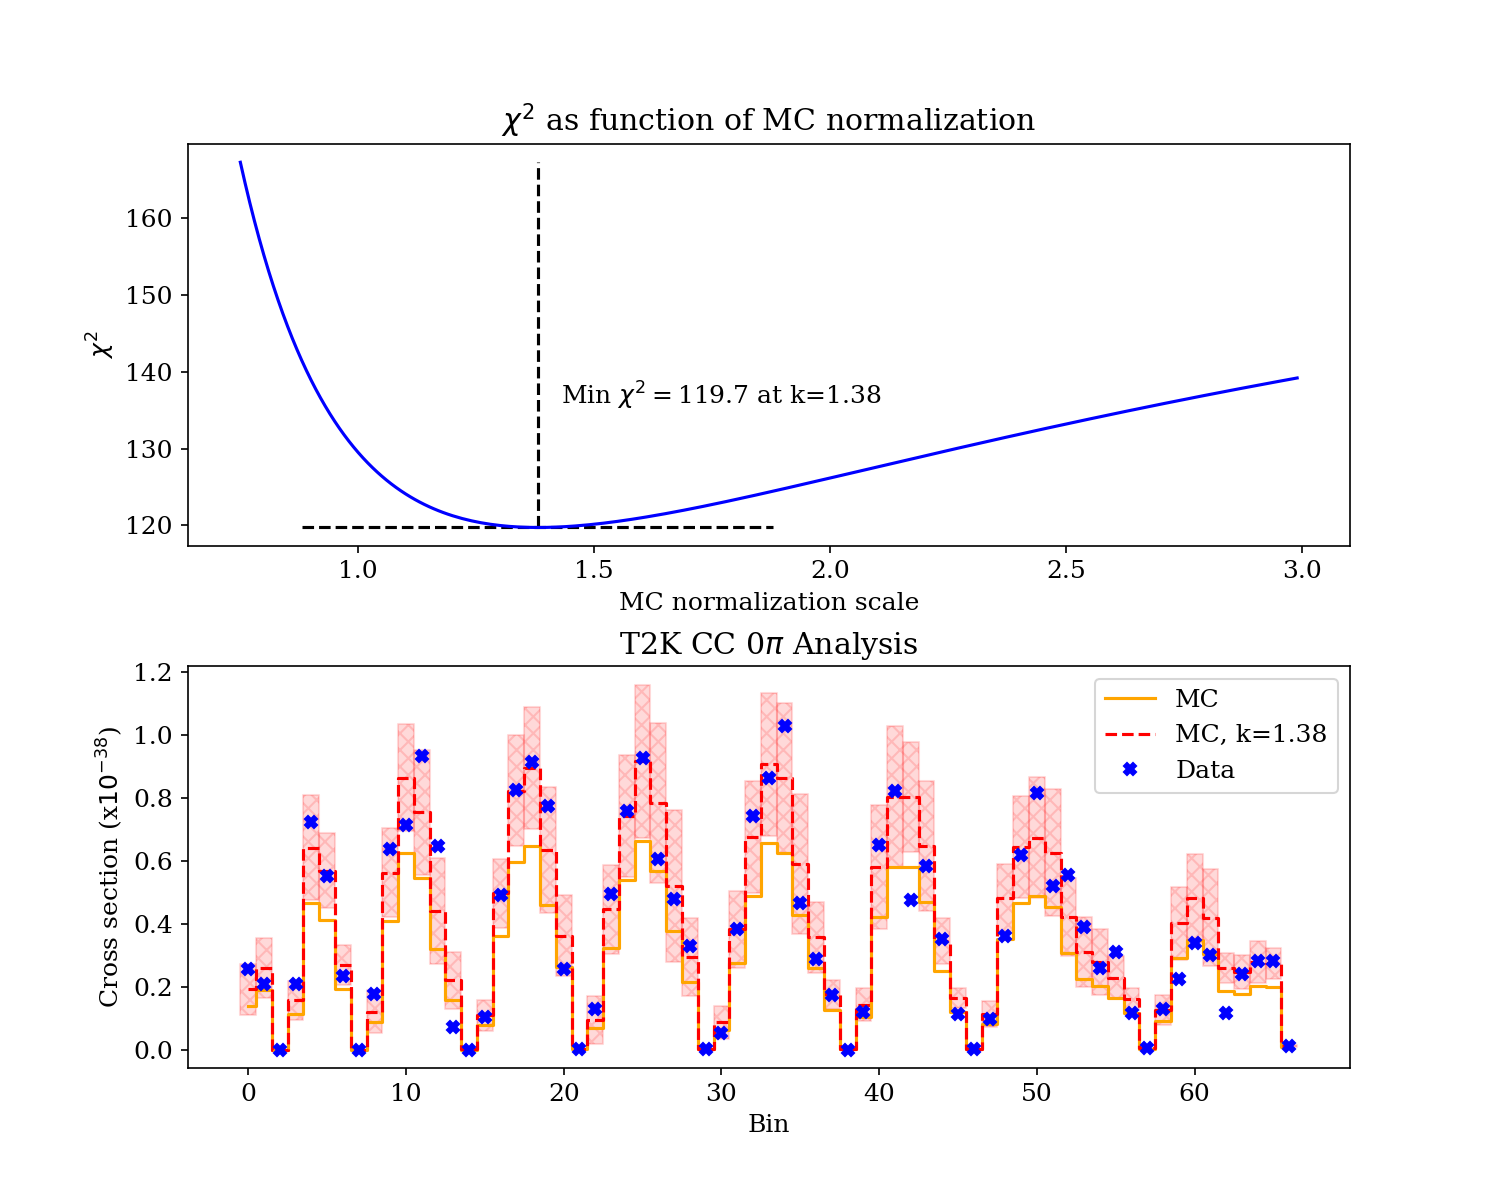

In [18]:
#let's see chi^2 as function of a straight normalization scale

#setup plot
fig,ax = plt.subplots(2,1)

#setup scales, and calculate chi2 at each scale value
scales=np.arange(start=0.75,stop=3.0,step=0.01)
chi2_per_scales = [ calc_chi2(m_cov=m_cov,data=data,exp=mc1,exp_scale=k) for k in scales ]
chi2_per_scales=np.array(chi2_per_scales)

#find minimum, and location of minimum
min_val = np.min(chi2_per_scales)
min_loc = scales[np.argmin(chi2_per_scales)]

#plot Chi2 as function of scale
ax[0].plot(scales,chi2_per_scales)
ax[0].hlines(np.min(chi2_per_scales),min_loc-0.5,min_loc+0.5,linestyle="--")
ax[0].vlines(min_loc,np.min(chi2_per_scales),np.max(chi2_per_scales),linestyle="--")
ax[0].text(min_loc+0.05,ax[0].get_ylim()[-1]*0.8,"Min $\chi^2=$%2.1f at k=%2.2f"%(np.min(chi2_per_scales),min_loc))
ax[0].set_title("$\chi^2$ as function of MC normalization")
ax[0].set_xlabel("MC normalization scale")
ax[0].set_ylabel("$\chi^2$")

ax[1].step(x=np.arange(len(mc1)),y=mc1,color='orange',linestyle="-",marker="",where="mid",label="MC")
ax[1].step(x=np.arange(len(mc1)),y=mc1*min_loc,color='r',linestyle="--",marker="",where="mid",label="MC, k=%2.2f"%min_loc)
plot_shaded_errors(ax[1],
                   x=np.arange(n_bins),xerr=np.full(n_bins,0.5),
                   y=mc1*min_loc,yerr=mc1_cov_err*min_loc,
                   facecolor='r',alpha=0.15,color='r',hatch="///\\\\\\")
ax[1].plot(np.arange(len(data)),data,linestyle="",marker="X",label="Data")
ax[1].set_title("T2K CC 0$\pi$ Analysis")
ax[1].set_xlabel("Bin")
ax[1].set_ylabel("Cross section (x$10^{-38}$)")
ax[1].legend()

plt.subplots_adjust(hspace=0.3)
plt.show()

#fig.savefig('t2k_cc0pi_chi2_normOpt.eps')
#fig.savefig('t2k_cc0pi_chi2_normOpt.pdf')

In [19]:
#now let's remove the smallest bins and repeat

#first define the bins we want to keep/consider
non_small_bins = [ i for i in range(len(data)) if data[i]>0.01 ]

#calculate the total chi2 for each set
chi2_tot_mc1 = calc_chi2(m_cov=m_cov,data=data,exp=mc1)
chi2_tot_mc1_nsb = calc_chi2_subset(m_cov=m_cov,data=data,exp=mc1,indices=non_small_bins)

print "Total chi2 compared to data:"
print "MC1, all bins: %f " % chi2_tot_mc1
print "MC1, remove small bins: %f " % chi2_tot_mc1_nsb


Total chi2 compared to data:
MC1, all bins: 129.468690 
MC1, remove small bins: 94.625703 


<IPython.core.display.Javascript object>


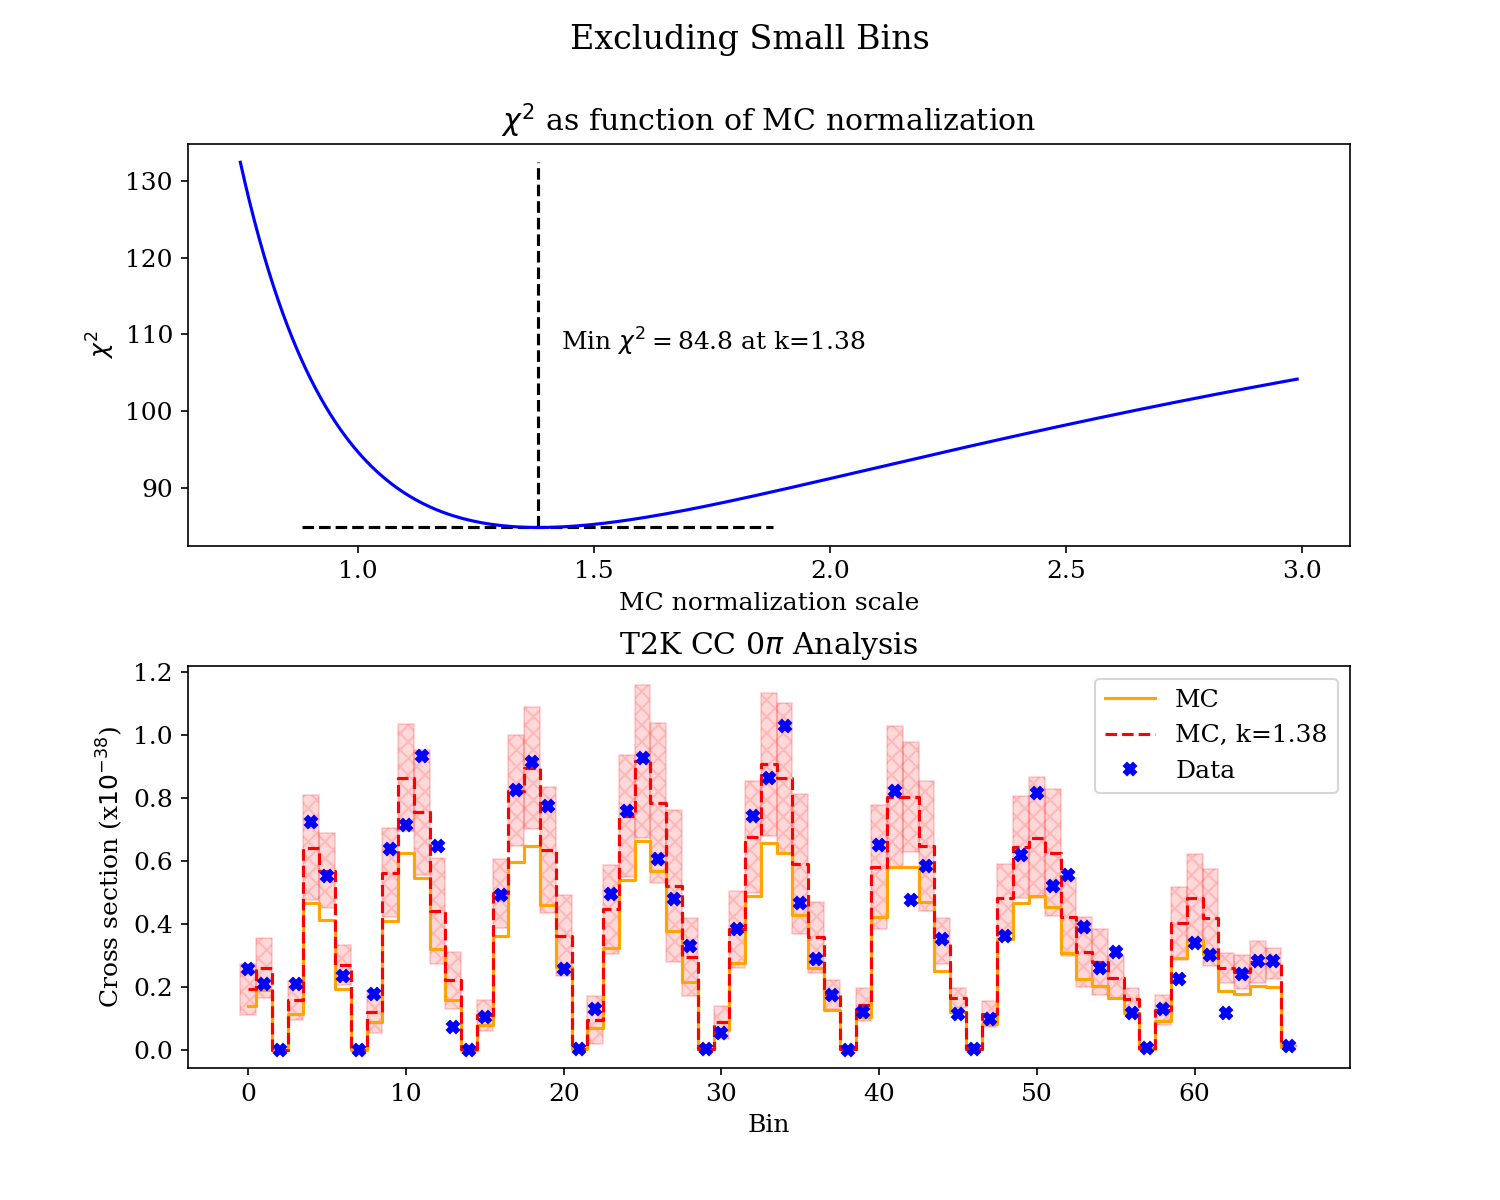

In [20]:
#let's see chi^2 as function of a straight normalization scale, but removing the "small" bins

fig,ax = plt.subplots(2,1)
fig.suptitle("Excluding Small Bins",fontsize=16)

scales=np.arange(start=0.75,stop=3.0,step=0.01)
chi2_per_scales = [ calc_chi2_subset(m_cov=m_cov,data=data,exp=mc1,indices=non_small_bins,exp_scale=k) for k in scales ]
chi2_per_scales=np.array(chi2_per_scales)

#find minimum, and location of minimum
min_val = np.min(chi2_per_scales)
min_loc = scales[np.argmin(chi2_per_scales)]

#plot Chi2 as function of scale
ax[0].plot(scales,chi2_per_scales)
ax[0].hlines(np.min(chi2_per_scales),min_loc-0.5,min_loc+0.5,linestyle="--")
ax[0].vlines(min_loc,np.min(chi2_per_scales),np.max(chi2_per_scales),linestyle="--")
ax[0].text(min_loc+0.05,ax[0].get_ylim()[-1]*0.8,"Min $\chi^2=$%2.1f at k=%2.2f"%(np.min(chi2_per_scales),min_loc))
ax[0].set_title("$\chi^2$ as function of MC normalization")
ax[0].set_xlabel("MC normalization scale")
ax[0].set_ylabel("$\chi^2$")

ax[1].step(x=np.arange(len(mc1)),y=mc1,color='orange',linestyle="-",marker="",where="mid",label="MC")
ax[1].step(x=np.arange(len(mc1)),y=mc1*min_loc,color='r',linestyle="--",marker="",where="mid",label="MC, k=%2.2f"%min_loc)
plot_shaded_errors(ax[1],
                   x=np.arange(n_bins),xerr=np.full(n_bins,0.5),
                   y=mc1*min_loc,yerr=mc1_cov_err*min_loc,
                   facecolor='r',alpha=0.15,color='r',hatch="///\\\\\\")
ax[1].plot(np.arange(len(data)),data,linestyle="",marker="X",label="Data")
ax[1].set_title("T2K CC 0$\pi$ Analysis")
ax[1].set_xlabel("Bin")
ax[1].set_ylabel("Cross section (x$10^{-38}$)")
ax[1].legend()

plt.subplots_adjust(hspace=0.3)
plt.show()

#fig.savefig('t2k_cc0pi_chi2_normOpt.eps')
#fig.savefig('t2k_cc0pi_chi2_normOpt.pdf')

In [21]:
#now let's setup some optimization function

from scipy.optimize import minimize

#x will be the return value
#m_cov,data,exp as expected
#then, list of indices taken as a "given" in the measurement
#then, list of indices over which we want to minimize --> predict measurement
def calc_chi2_min(x,m_cov,data,exp,indices_given,indices_min):
    m_cov_subset = get_matrix_subset(m_cov,indices_given+indices_min)
    data_subset = np.append(get_array_subset(data,indices_given),x)
    exp_subset = get_array_subset(exp,indices_given+indices_min)
    return calc_chi2(m_cov=m_cov_subset,data=data_subset,exp=exp_subset)

In [22]:
#ok, let's try this with the last set of bins (58-66)
#and let's solve for the rest

#so, given the measurement we see in bins 58-66...
indices_given = range(58,67)

#let's get a prediction of what we would otherwise expect...
indices_solve = [i for i in range(n_bins) if i not in indices_given]

x0 = mc1[indices_solve]
res = minimize(calc_chi2_min, x0, args=(m_cov,data,mc1,indices_given,indices_solve),
               method='BFGS',options={'disp': True})

i_solve=0
min_results = np.array([])
for i in range(n_bins):
    if i in indices_given:
        min_results = np.append(min_results,data[i])
    else:
        min_results = np.append(min_results,res.x[i_solve])
        i_solve+=1

         Current function value: 24.112012
         Iterations: 66
         Function evaluations: 5474
         Gradient evaluations: 91


In [23]:
#print out the results of the fit...

print "Prediction vs. data, given measurements in last bins"
print "\t\tPred, Data, Difference, Error"
for i in range(n_bins):
    print "\tBin %d: %f %f %f %f"%(i,min_results[i],data[i],min_results[i]-data[i],data_err[i])


Prediction vs. data, given measurements in last bins
		Pred, Data, Difference, Error
	Bin 0: 0.170932 0.255394 -0.084462 0.059204
	Bin 1: 0.218431 0.207948 0.010483 0.069722
	Bin 2: 0.000136 0.000272 -0.000136 0.000152
	Bin 3: 0.163682 0.208457 -0.044775 0.044873
	Bin 4: 0.643205 0.724434 -0.081229 0.121277
	Bin 5: 0.555005 0.551849 0.003156 0.086287
	Bin 6: 0.235384 0.234113 0.001271 0.046102
	Bin 7: 0.000437 0.000369 0.000069 0.000102
	Bin 8: 0.129039 0.178667 -0.049628 0.049448
	Bin 9: 0.440925 0.638440 -0.197515 0.103002
	Bin 10: 0.781890 0.714696 0.067194 0.122527
	Bin 11: 0.730675 0.935747 -0.205072 0.143764
	Bin 12: 0.423043 0.646835 -0.223792 0.121955
	Bin 13: 0.163957 0.071505 0.092453 0.066510
	Bin 14: 0.000716 0.000476 0.000240 0.000259
	Bin 15: 0.097192 0.104217 -0.007025 0.036590
	Bin 16: 0.477564 0.490643 -0.013079 0.079740
	Bin 17: 0.827045 0.824596 0.002449 0.127476
	Bin 18: 0.767610 0.915528 -0.147918 0.140029
	Bin 19: 0.608924 0.775158 -0.166234 0.144310
	Bin 20: 0.32

<IPython.core.display.Javascript object>


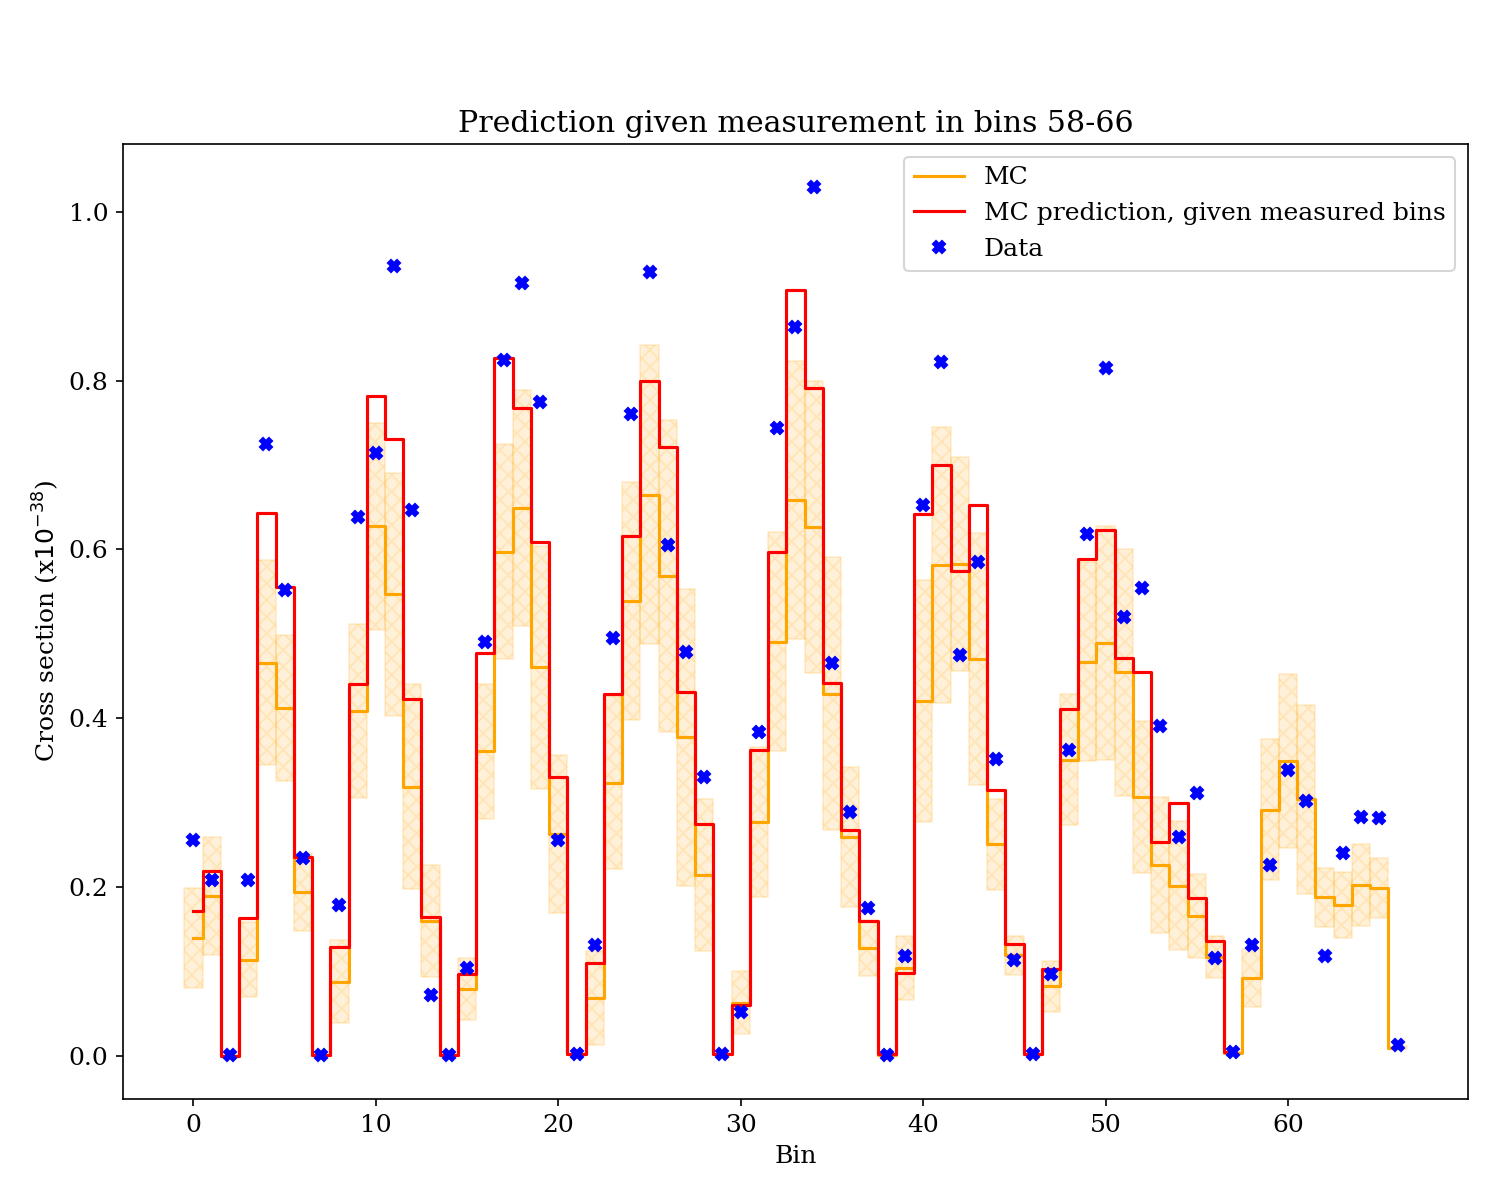

In [24]:
# We can now plot the data versus MC, and include the updated prediction for the rest of the bins
# given the data points in 58-66
#

f,ax = plt.subplots()

ax.step(x=np.arange(len(mc1)),y=mc1,color='orange',linestyle="-",marker="",where="mid",label="MC")
plot_shaded_errors(ax,
                   x=np.arange(n_bins),xerr=np.full(n_bins,0.5),
                   y=mc1,yerr=mc1_cov_err,
                   facecolor='orange',alpha=0.15,color='orange',hatch="///\\\\\\")
ax.step(x=indices_solve,y=res.x,color='r',linestyle="-",marker="",where="mid",label="MC prediction, given measured bins")
ax.plot(np.arange(len(data)),data,linestyle="",marker="X",label="Data")
ax.set_title("T2K CC 0$\pi$ Analysis")
ax.set_xlabel("Bin")
ax.set_ylabel("Cross section (x$10^{-38}$)")
ax.legend()
ax.set_title("Prediction given measurement in bins %d-%d"%(indices_given[0],indices_given[-1]))
f.tight_layout()
f.subplots_adjust(top=0.88)

plt.show()


In [25]:
#for fun, if we had measured that red line, the chi2 would have been pretty good!!

#calculate the total chi2 for each set
chi2_tot_mc1 = calc_chi2(m_cov=m_cov,data=data,exp=mc1)
chi2_tot_mc1_update = calc_chi2(m_cov=m_cov,data=min_results,exp=mc1)

print "Total chi2 compared to MC1:"
print "Data: %f " % chi2_tot_mc1
print "Updated prediction given measurement in bins 58-66: %f " % chi2_tot_mc1_update


Total chi2 compared to MC1:
Data: 129.468690 
Updated prediction given measurement in bins 58-66: 24.112012 
